In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util,transform

# otsu

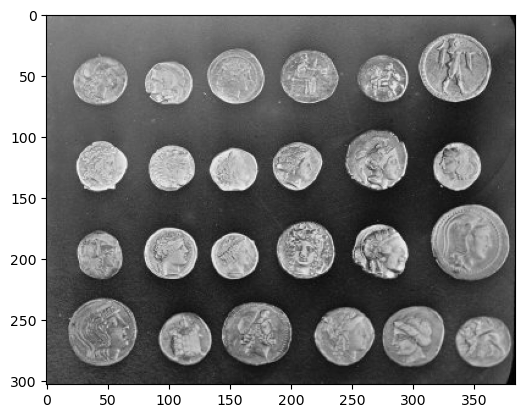

In [2]:
im=data.coins()
plt.imshow(im,cmap='gray')

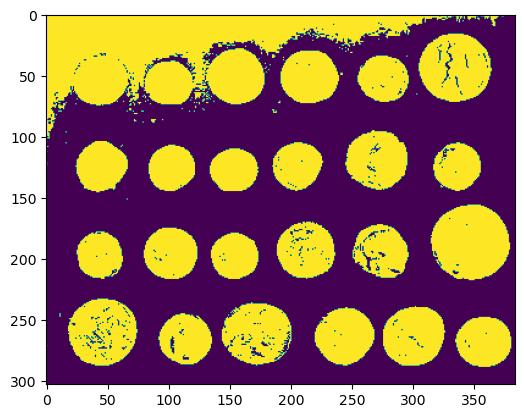

In [3]:
f=np.zeros(255)
minf=0
mini=0
for i in range(100,200):
    c1=im[im<=i]
    c2=im[im>i]
    m1=np.mean(c1)
    m2=np.mean(c2)
    std1=np.std(c1)
    std2=np.std(c2)
    std3=np.std([m1,m2])
    f[i]=std3/(1+std1*std2)
    if f[i] > minf :
        minf=std3
        mini=i

plt.imshow(np.uint8(im>mini)*255)

# line detect

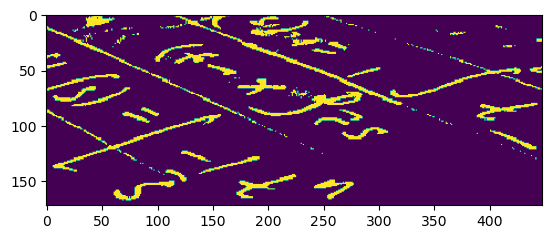

In [4]:
im=data.text()
plt.imshow(im)
seg=im<100
plt.imshow(seg)

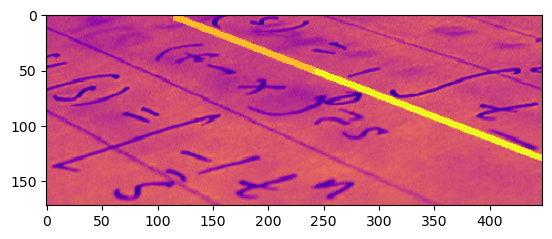

In [21]:
r=transform.radon(seg)
rho,theta=np.unravel_index(np.argmax(r),r.shape)
rho=rho-r.shape[0]/2
x=np.int64(rho*np.cos((theta+90)*np.pi/180)+im.shape[0]/2)
y=np.int64(rho*np.sin((theta+90)*np.pi/180)+im.shape[1]/2)
dx=np.cos((theta)*np.pi/180)
dy=np.sin((theta)*np.pi/180)

l=1000
res=im.copy()
w=5
for l in range(1000):
    n=np.int64(y+dy*l)
    m=np.int64(x+dx*l)
    if m>0 and n>0 and m< seg.shape[0] and n< seg.shape[1]:
        res[m:m+w,n:n+w]=255
    else:
        break
for l in range(1000):
    n=np.int64(y+dy*l*-1)
    m=np.int64(x+dx*l*-1)
    if m>0 and n>0 and m< seg.shape[0] and n< seg.shape[1]:
        res[m:m+w,n:n+w]=220
    else:
        break
#cv2.line(res,(np.int(y-dy*l),np.int(x-dx*l)),(np.int(y+dy*l),np.int(x+dx*l)),255,2)
plt.imshow(res,cmap="plasma")